# **Libraries**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import pyplot
from heapq import heappush, heappop, heapify
from collections import defaultdict
from bitarray import bitarray
from PyQt5.QtCore import *
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
import scipy.misc
from PIL import Image 
import PIL 

# **Huffman Coding**

In [ ]:
def build_huffman_tree(freq):
    heap = [[freq, [symbol, ""]] for symbol, freq in freq.items()]  
    heapify(heap)
    # loop till only one node left in the heap
    while(len(heap)>1):
        # getting least value node
        left=heappop(heap)
        # getting least value node
        right=heappop(heap)
        # assigning code from bottom to up
        for node in left[1:]:
          # 0 for left child
          node[1]="0"+node[1]
        for node in right[1:]:
          # 1 for right child 
          node[1]="1"+node[1]
        # new node value as sum of two minimum value node values
        new_node_value=left[0] + right[0]
        # pushing new node into heap
        heappush(heap, [new_node_value] + left[1:] + right[1:])
    huffman_tree_left=left[1:]
    huffman_tree_right=right[1:]
    # list of all nodes in the huffman tree
    huffman_list=huffman_tree_left+huffman_tree_right
    return huffman_list

In [ ]:
def get_huffman_encodings(huffman_list):
    huffman_encodings={}
    for a in huffman_list:
        huffman_encodings[a[0]]=bitarray(str(a[1]))
    return huffman_encodings

In [ ]:
def compress(img,huffman_encodings,imgshape):
    enc_image=bitarray()
    enc_image.encode(huffman_encodings,img)
    with open('compressed_file.bin', 'wb') as w:
        enc_image.tofile(w)
    decoded_out = bitarray()

    padding = 8 - (len(enc_image) % 8)

    with open('compressed_file.bin', 'rb') as r:
        decoded_out.fromfile(r)

    decoded_out = decoded_out[:-padding]
    decoded_out = decoded_out.decode(huffman_encodings) 

    decoded_out = np.array(decoded_out);
    output = np.reshape(decoded_out, (imgshape[0], imgshape[1],imgshape[2]))
    comp_ratio=compression_ratio(enc_image,img)  
    return (output,comp_ratio)

In [ ]:
def compression_ratio(enc_image,img):
    compressed_length=len(enc_image)
    uncompressed_length=len(img)*8
    compression_ratio=uncompressed_length/compressed_length
    return compression_ratio

In [ ]:
def huffman(img):
    # img=plt.imread(filename)
    imgshape = img.shape
    # Reshaping the 3D array into 1D array
    img = np.reshape(img, (1, imgshape[0]*imgshape[1]*imgshape[2]))
    img = img.tolist()[0]
    # Calculating frequency of each pixel intensity in a dictionary.
    freq=defaultdict(int)
    for x in img:
        freq[x]+=1
    huffman_list=build_huffman_tree(freq)
    huffman_encodings=get_huffman_encodings(huffman_list)
    output=compress(img,huffman_encodings,imgshape)
    # print("compression_ratio :",output[1])
    return output[0]

In [ ]:
def huffman_compression(img):
    return huffman(img)

# **Bit Plane Coding**

In [ ]:
def binary_array(value,width):
  
    arr = []
  
    while(value > 0):
        arr.append(value%2)
        value = value//2

    for i in range(len(arr),width):
        arr.append(0)

    return arr[::-1]  

In [ ]:
def pixel_to_binary(img):
    arr = [[None for j in range(img.shape[1])] for i in range(img.shape[0])]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            R = binary_array(img[i][j][0],8)
            G = binary_array(img[i][j][1],8)
            B = binary_array(img[i][j][2],8)
            arr[i][j] = [R,G,B]
    return arr

## Eighth Bit Plane

In [ ]:
def bit_plane_eight(arr,img):
    
    eight_bit_img = [[[0 for k in range(3)] for j in range(img.shape[1])] for i in range(img.shape[0])]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                eight_bit_img[i][j][k] = arr[i][j][k][0]*128

    # Display the image
    plt.imshow(eight_bit_img) 
    plt.show()

    return eight_bit_img


## Seventh Bit Plane

In [ ]:
def bit_plane_seven(arr,img):
    
    seven_bit_img = [[[0 for k in range(3)] for j in range(img.shape[1])] for i in range(img.shape[0])]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                seven_bit_img[i][j][k] = arr[i][j][k][1]*64

    # Display the image
    plt.imshow(seven_bit_img) 
    plt.show()

    return seven_bit_img

## Sixth Bit Plane

In [ ]:
def bit_plane_six(arr,img):
    six_bit_img = [[[0 for k in range(3)] for j in range(img.shape[1])] for i in range(img.shape[0])]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                six_bit_img[i][j][k] = arr[i][j][k][2]*32

    # Display the image
    plt.imshow(six_bit_img) 
    plt.show()

    return six_bit_img

## Fifth Bit Plane

In [ ]:
def bit_plane_five(arr,img):
    
    five_bit_img = [[[0 for k in range(3)] for j in range(img.shape[1])] for i in range(img.shape[0])]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                five_bit_img[i][j][k] = arr[i][j][k][3]*16

    # Display the image
    plt.imshow(five_bit_img) 
    plt.show()

    return five_bit_img

## Fourth Bit Plane

In [ ]:
def bit_plane_four(arr,img):

    four_bit_img = [[[0 for k in range(3)] for j in range(img.shape[1])] for i in range(img.shape[0])]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                four_bit_img[i][j][k] = arr[i][j][k][4]*8

    # Display the image
    plt.imshow(four_bit_img) 
    plt.show()

    return four_bit_img

## Third Bit Plane

In [ ]:
def bit_plane_three(arr,img):

    three_bit_img = [[[0 for k in range(3)] for j in range(img.shape[1])] for i in range(img.shape[0])]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                three_bit_img[i][j][k] = arr[i][j][k][5]*4

    # Display the image
    plt.imshow(three_bit_img) 
    plt.show()

    return three_bit_img

## Second Bit Plane

In [ ]:
def bit_plane_two(arr,img):

    two_bit_img = [[[0 for k in range(3)] for j in range(img.shape[1])] for i in range(img.shape[0])]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                two_bit_img[i][j][k] = arr[i][j][k][6]*2

    # Display the image
    plt.imshow(two_bit_img) 
    plt.show()

    return two_bit_img

## First Bit Plane

In [ ]:
def bit_plane_one(arr,img):

    one_bit_img = [[[0 for k in range(3)] for j in range(img.shape[1])] for i in range(img.shape[0])]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                one_bit_img[i][j][k] = arr[i][j][k][7]*1

    # Display the image
    plt.imshow(one_bit_img) 
    plt.show()

    return one_bit_img

## ***COMPRESSED IMAGE***

In [ ]:
def compress_image(image_arr,img):
    
    compressed_image = [[None for j in range(img.shape[1])] for i in range(img.shape[0])]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_arr = [0,0,0]
            for k in range(img.shape[2]):
                for plane in image_arr:
                    pixel_arr[k] += plane[i][j][k]
            compressed_image[i][j] = tuple(pixel_arr)

    # Display the image
    plt.imshow(compressed_image) 
    plt.show()

    return compressed_image

## Bit Plane Slicing Function

In [ ]:
def bit_plane_slicing(img):
    arr = pixel_to_binary(img)
    
    eighth_plane = bit_plane_eight(arr,img)
    seventh_plane = bit_plane_seven(arr,img)
    sixth_plane = bit_plane_six(arr,img)
    fifth_plane = bit_plane_five(arr,img)
    fourth_plane = bit_plane_four(arr,img)
    third_plane = bit_plane_three(arr,img)
    second_plane = bit_plane_two(arr,img)
    first_plane = bit_plane_one(arr,img)
    
    image_arr = [eighth_plane, seventh_plane, sixth_plane, fifth_plane, fourth_plane]
    
    compressed_image = compress_image(image_arr,img)
    return compressed_image
    

# GUI

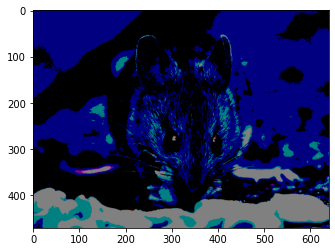

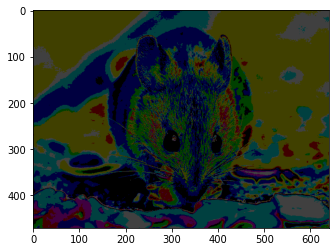

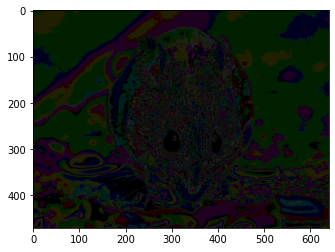

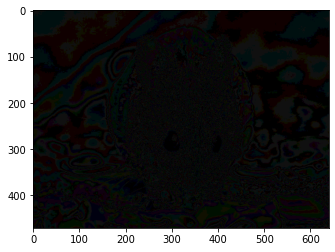

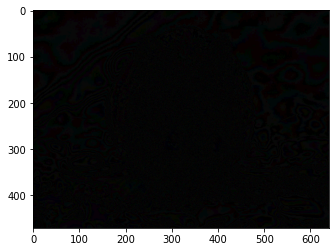

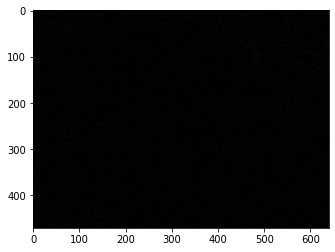

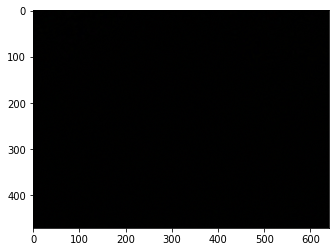

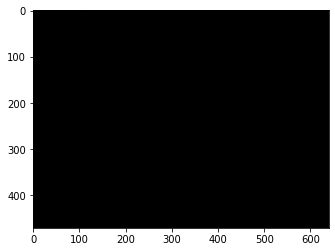

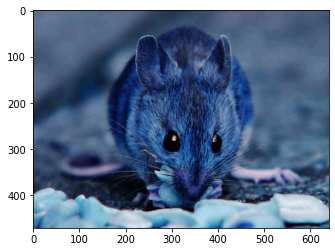

('C:/Users/dell/Desktop/IP/Images/mouse_bit_plane.jpg', 'All Files (*)')


SystemExit: 0

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
class Img_Proc_Gui(QWidget):
    def __init__(self, parent=None):
        
        # Layout of GUI
        super(Img_Proc_Gui, self).__init__(parent)
        self.setGeometry(400,300,800,600)
        self.setWindowTitle('Image Processing')
        
        # Buttons in Horizontal layout for Processing Image and Quitting Application
        self.img_processed = False
        btn_process_img = QPushButton("Process Image")
        #calling for INPUT
        btn_process_img.clicked.connect(self.getInput)

        btn_quit = QPushButton("Quit")
        btn_quit.clicked.connect(self.quit_clicked)
        
        hbox_btn = QHBoxLayout()
        hbox_btn.addWidget(btn_process_img)
        hbox_btn.addWidget(btn_quit)
        
        
        # Horizontal Box for taking image input from the system
        hbox_address = QHBoxLayout()
        self.address = QLineEdit()
        hbox_address.addWidget(self.address)
        btn_img_explorer = QPushButton('Open Image')
        btn_img_explorer.clicked.connect(self.open)
        hbox_address.addWidget(btn_img_explorer)

        # Compression Operations
        hbox_colorscale = QHBoxLayout()
        color_scale = QLabel('Compression Type :')
        self.huffman = QRadioButton('Huffman',self)
        self.bit_plane = QRadioButton('Bit Plane',self)
        hbox_colorscale.addWidget(color_scale)
        hbox_colorscale.addWidget(self.huffman)
        hbox_colorscale.addWidget(self.bit_plane)
        
        
        # Image Holders for Input and Output Images
        hbox_image_holder = QHBoxLayout()
        self.label_1 = QLabel('Input Image', self)
        self.label_1.resize(400,300)
        hbox_image_holder.addWidget(self.label_1)
        self.label_2 = QLabel('Output Image', self)
        self.label_2.resize(400,300)
        hbox_image_holder.addWidget(self.label_2)
        
        
        # Layout for showing the path of input and output images
        hbox_image_address = QHBoxLayout()
        
        vbox_input = QVBoxLayout()
        self.address_input = QLineEdit()
        self.btn_input = QPushButton('Input')
        vbox_input.addWidget(self.address_input)
        vbox_input.addWidget(self.btn_input)
        
        vbox_output = QVBoxLayout()
        self.address_output = QLineEdit()
        self.btn_output = QPushButton('Output')
        vbox_output.addWidget(self.address_output)
        vbox_output.addWidget(self.btn_output)
        
        hbox_image_address.addLayout(vbox_input)
        hbox_image_address.addLayout(vbox_output)
        
        
        # Adding all the layouts in one vertical layout
        vbox = QVBoxLayout()
        vbox.addLayout(hbox_address)
        vbox.addLayout(hbox_colorscale)
        vbox.addLayout(hbox_btn)
        vbox.addLayout(hbox_image_address)
        vbox.addLayout(hbox_image_holder)

        # Setting the layout of GUI 
        self.setLayout(vbox)
        
        

    #@pyqtSlot()
    def quit_clicked(self):
        print("Good Bye !!")
        cv2.destroyAllWindows()
        self.close()

   # @pyqtSlot()
    def open(self):
        fileName = QFileDialog.getOpenFileName(self,'openFile')
        self.address.setText(fileName[0])
        self.address_input.setText(fileName[0])
        pixmap = QPixmap(fileName[0])
        pixmap = pixmap.scaled(400,300)
        self.label_1.setPixmap(pixmap)


    def save(self):
        saveFile = QFileDialog.getSaveFileName(self,'saveFile')
        print(saveFile)
        self.address_output.setText(saveFile[0])
#         cv2.imwrite(str(self.address_output.text()),self.req_img)
        array = np.array(self.req_img, dtype=np.uint8)
        img = Image.fromarray(array)
        img = img.convert("RGB", colors=256)
        img.save(str(self.address_output.text()))
        pixmap = QPixmap(saveFile[0])
        pixmap = pixmap.scaled(400,300)
        self.label_2.setPixmap(pixmap)


    def getInput(self):
        self.req_img = self.process_img(cv2.imread(self.address.text()))
        self.save()

    def process_img(self,imgtoproc):
        if self.huffman.isChecked():
            imgtoproc = huffman_compression(imgtoproc)
        elif self.bit_plane.isChecked():
            imgtoproc = bit_plane_slicing(imgtoproc)

        return imgtoproc
    


if __name__ == '__main__':
    import sys

    app = QApplication(sys.argv)

    screen = Img_Proc_Gui()
    screen.show()
    sys.exit(app.exec_())